In [4]:
#Удаление заставки из видео
import numpy as np
import cv2
fgbg = cv2.bgsegm.createBackgroundSubtractorMOG()
static_back = None
video = cv2.VideoCapture('abc.mp4')
length = int (video.get(cv2.CAP_PROP_FRAME_COUNT))
width = int (video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int (video.get(cv2.CAP_PROP_FRAME_HEIGHT))
out = cv2.VideoWriter('bez_zastavki2.mp4', cv2.VideoWriter_fourcc(*'MP4V'),30.0,(width,height))
k=0
flag = 0
flag2 = 0
sum_pred = 0
sum1 = 0
k_posle = 0
while(video.isOpened() and k < length):
    ret, frame = video.read()
    k+=1
    fgmask = fgbg.apply(frame)
    sum_pred = sum1
    sum1 = np.sum(fgmask)
    if sum1 > 3000000 and sum_pred  == 0 and flag != 0 and flag2 ==0:
        flag2 = k
    if sum1 > 3000000 and sum_pred  == 0 and flag == 0:
        flag = k
    cv2.imshow('frame', fgmask)
    key = cv2.waitKey(10)
    if flag != 0 and flag2 ==0:
        k_posle = k_posle + 1
        out.write(frame)
    if key == ord('q'):
        break
video.release()
out.release()
cv2.destroyAllWindows()
print(k)
print(k_posle)



1838
1589


In [2]:
import numpy as np
import cv2
#оставляем на видео только горение свечи
static_back = None
video = cv2.VideoCapture('abc_zastavka3.mp4')
length = int (video.get(cv2.CAP_PROP_FRAME_COUNT))
width = int (video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int (video.get(cv2.CAP_PROP_FRAME_HEIGHT))
out = cv2.VideoWriter('result.mp4', cv2.VideoWriter_fourcc(*'MP4V'),30.0,(width,height))
k=0
rgb_min = np.array((180, 100, 40), np.uint8)
rgb_max = np.array((255, 255, 255), np.uint8)
flag2 = 0
k_new = 0
while (video.isOpened() and k < length):
    k+=1
    check,frame = video.read()
    motion = 0
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    thresh = cv2.inRange(rgb, rgb_min, rgb_max)
    sum1 = np.sum(thresh)
    if sum1 ==0:
        flag2 = k
    cv2.imshow('frame', thresh)
    if flag2 == 0:
        k_new = k_new + 1
        out.write(frame)
    key = cv2.waitKey(10)
    if key == ord('q'):
        break

video.release()
out.release()
cv2.destroyAllWindows()

print(k)
print(k_new)

1589
167


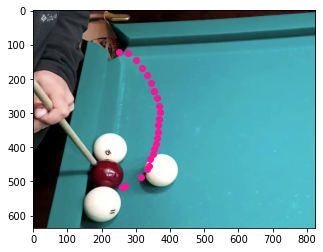

In [3]:
# траектория движения красного шара
import numpy as np
import cv2
static_back = None
video = cv2.VideoCapture('bil.mp4')
length = int (video.get(cv2.CAP_PROP_FRAME_COUNT))
width = int (video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int (video.get(cv2.CAP_PROP_FRAME_HEIGHT))

k=0
rgb_min = np.array((78, 12, 10), np.uint8)
rgb_max = np.array((163, 61, 79), np.uint8)
flag2 = 0
arr = []
x1=[]
y1=[]
while (video.isOpened() and k < length):
    k+=1
    check,frame = video.read()
    if k == 1:
        cv2.imwrite("cadr.jpg", frame)
    motion = 0
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    thresh = cv2.inRange(rgb, rgb_min, rgb_max)
    
    cnts, _ = cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for contour in cnts:
        if cv2.contourArea(contour) < 1000:
            continue
        motion=1
        (x, y, w, h) = cv2.boundingRect(contour)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (155, 50, 165), 3)
        if (x+w,y+h) not in arr:
            arr.append((x+w,y+h))
            x1.append(x+w)
            y1.append(y+h)
    #cv2.imshow('Color frame', frame)
    #cv2.imshow('frame', thresh)
    key = cv2.waitKey(10)
    if key == ord('q'):
        break

video.release()
cv2.destroyAllWindows()

import matplotlib.pyplot as plt
img = plt.imread("cadr.jpg")
fig, ax = plt.subplots()
ax.scatter(x1, y1,
           c = 'deeppink')
ax.imshow(img)

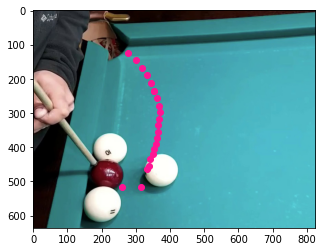

In [4]:
import numpy as np
import cv2
static_back = None
video = cv2.VideoCapture('bil.mp4')
length = int (video.get(cv2.CAP_PROP_FRAME_COUNT))
width = int (video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int (video.get(cv2.CAP_PROP_FRAME_HEIGHT))
fgbg = cv2.bgsegm.createBackgroundSubtractorMOG()
k=0
rgb_min = np.array((78, 12, 10), np.uint8)
rgb_max = np.array((163, 61, 79), np.uint8)
flag2 = 0
arr = []
x1=[]
y1=[]
while (video.isOpened() and k < length):
    k+=1
    check,frame = video.read()
    if k == 1:
        cv2.imwrite("cadr2.jpg", frame)
    motion = 0
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    thresh = cv2.inRange(rgb, rgb_min, rgb_max)
    fgmask = fgbg.apply(thresh)
    cnts, _ = cv2.findContours(fgmask.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for contour in cnts:
        if cv2.contourArea(contour) < 1000:
            continue
        motion=1
        (x, y, w, h) = cv2.boundingRect(contour)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (155, 50, 165), 3)
        if (x+w,y+h) not in arr:
            arr.append((x+w,y+h))
            x1.append(x+w)
            y1.append(y+h)
    #cv2.imshow('Color frame', frame)
    #cv2.imshow('frame', thresh)
    key = cv2.waitKey(10)
    if key == ord('q'):
        break

video.release()
cv2.destroyAllWindows()

import matplotlib.pyplot as plt
img = plt.imread("cadr2.jpg")
fig, ax = plt.subplots()
ax.scatter(x1, y1,
           c = 'deeppink')
ax.imshow(img)

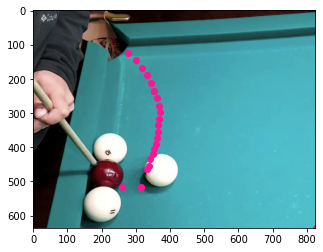

In [6]:
import numpy as np
import cv2
static_back = None
video = cv2.VideoCapture('bil.mp4')
length = int (video.get(cv2.CAP_PROP_FRAME_COUNT))
width = int (video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int (video.get(cv2.CAP_PROP_FRAME_HEIGHT))
fgbg = cv2.createBackgroundSubtractorMOG2()
k=0
rgb_min = np.array((78, 12, 10), np.uint8)
rgb_max = np.array((163, 61, 79), np.uint8)
flag2 = 0
arr = []
x1=[]
y1=[]
while (video.isOpened() and k < length):
    k+=1
    check,frame = video.read()
    if k == 1:
        cv2.imwrite("cadr2.jpg", frame)
    motion = 0
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    thresh = cv2.inRange(rgb, rgb_min, rgb_max)
    fgmask = fgbg.apply(thresh)
    cnts, _ = cv2.findContours(fgmask.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for contour in cnts:
        if cv2.contourArea(contour) < 1000:
            continue
        motion=1
        (x, y, w, h) = cv2.boundingRect(contour)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (155, 50, 165), 3)
        if (x+w,y+h) not in arr:
            arr.append((x+w,y+h))
            x1.append(x+w)
            y1.append(y+h)
    #cv2.imshow('Color frame', frame)
    #cv2.imshow('frame', thresh)
    key = cv2.waitKey(10)
    if key == ord('q'):
        break

video.release()
cv2.destroyAllWindows()

import matplotlib.pyplot as plt
img = plt.imread("cadr2.jpg")
fig, ax = plt.subplots()
ax.scatter(x1, y1,
           c = 'deeppink')
ax.imshow(img)

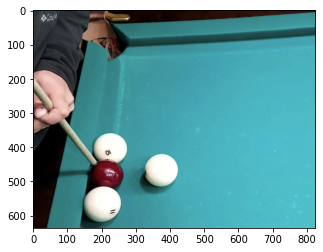

In [7]:
import numpy as np
import cv2
static_back = None
video = cv2.VideoCapture('bil.mp4')
length = int (video.get(cv2.CAP_PROP_FRAME_COUNT))
width = int (video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int (video.get(cv2.CAP_PROP_FRAME_HEIGHT))
fgbg = cv2.bgsegm.createBackgroundSubtractorGMG()
k=0
rgb_min = np.array((78, 12, 10), np.uint8)
rgb_max = np.array((163, 61, 79), np.uint8)
flag2 = 0
arr = []
x1=[]
y1=[]
while (video.isOpened() and k < length):
    k+=1
    check,frame = video.read()
    if k == 1:
        cv2.imwrite("cadr3.jpg", frame)
    motion = 0
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    thresh = cv2.inRange(rgb, rgb_min, rgb_max)
    fgmask = fgbg.apply(thresh)
    cnts, _ = cv2.findContours(fgmask.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for contour in cnts:
        if cv2.contourArea(contour) < 1000:
            continue
        motion=1
        (x, y, w, h) = cv2.boundingRect(contour)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (155, 50, 165), 3)
        if (x+w,y+h) not in arr:
            arr.append((x+w,y+h))
            x1.append(x+w)
            y1.append(y+h)
    #cv2.imshow('Color frame', frame)
    #cv2.imshow('frame', thresh)
    key = cv2.waitKey(10)
    if key == ord('q'):
        break

video.release()
cv2.destroyAllWindows()

import matplotlib.pyplot as plt
img = plt.imread("cadr3.jpg")
fig, ax = plt.subplots()
ax.scatter(x1, y1,
           c = 'deeppink')
ax.imshow(img)

In [8]:
# считаем количество мячей
import numpy as np
import cv2
static_back = None
video = cv2.VideoCapture('balls2.mp4')
length = int (video.get(cv2.CAP_PROP_FRAME_COUNT))
width = int (video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int (video.get(cv2.CAP_PROP_FRAME_HEIGHT))
out = cv2.VideoWriter('balls_kolvo.mp4', cv2.VideoWriter_fourcc(*'MP4V'),24.0,(width,height))
k=0
arr_kolvo = []
fgbg = cv2.bgsegm.createBackgroundSubtractorMOG()
while (k < 570):
    k+=1
    check, frame = video.read()
    motion = 0
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (11,11), 0)
    gray = fgbg.apply(gray)
    if static_back is None:
        static_back = gray
        continue
    
    diff_frame = cv2.absdiff(static_back,gray)
    thresh_frame = cv2.threshold(diff_frame, 70, 255, cv2.THRESH_BINARY)[1]
    thresh_frame = cv2.dilate(thresh_frame, None, iterations = 2)
    cnts, _ = cv2.findContours(thresh_frame.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    kolvo = 0
    for contour in cnts:
        if cv2.contourArea(contour) < 1000:
            continue
        motion=1
        (x, y, w, h) = cv2.boundingRect(contour)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (155, 50, 165), 3)
        kolvo = kolvo + 1
        arr_kolvo.append(kolvo)
    text = 'kol-vo:' + str(kolvo)
    cv2.putText(frame, text, (500,70), cv2.FONT_HERSHEY_PLAIN, 5, (50, 60, 10), 6)
    out.write(frame)
    #cv2.imshow("Gray", gray)
    #cv2.imshow("Difference frame", diff_frame)
    #cv2.imshow('Threshold frame', thresh_frame)
    #cv2.imshow('Color frame', frame)
    

    key = cv2.waitKey(1)

    if key == ord('q'):
        break

video.release()
out.release()
cv2.destroyAllWindows()

In [13]:
# склеиваем видео из 100 пород кошек
import numpy as np
import cv2
import os
import random

pic_list = os.listdir("/Users/roza/Downloads/cat")
random.shuffle(pic_list)

length = 100
width = 250
height = 250
out = cv2.VideoWriter('cats2.mp4', cv2.VideoWriter_fourcc(*'MP4V'),5.0,(width,height))

for i in range(100):
    img = cv2.imread("/Users/roza/Downloads/cat/" + pic_list[i])
    new_picture = cv2.resize(img, (250, 250))
    out.write(new_picture)
out.release()

[[[154 170 183]
  [154 170 183]
  [155 171 184]
  ...
  [144 161 174]
  [145 162 175]
  [146 163 176]]

 [[154 170 183]
  [154 170 183]
  [155 171 184]
  ...
  [146 163 176]
  [147 164 177]
  [148 165 178]]

 [[154 170 183]
  [154 170 183]
  [155 171 184]
  ...
  [146 163 176]
  [147 164 177]
  [147 164 177]]

 ...

 [[ 37  37  37]
  [ 49  49  49]
  [ 40  40  40]
  ...
  [185 207 219]
  [188 207 220]
  [187 209 221]]

 [[ 45  45  45]
  [ 57  57  57]
  [ 40  40  40]
  ...
  [192 212 223]
  [192 211 224]
  [193 213 224]]

 [[ 52  52  52]
  [ 62  62  62]
  [ 36  36  36]
  ...
  [191 210 218]
  [191 209 220]
  [190 209 217]]]
[[[255 240 211]
  [255 248 219]
  [255 245 214]
  ...
  [172 205 238]
  [172 205 238]
  [172 205 238]]

 [[209 191 162]
  [212 194 165]
  [204 186 155]
  ...
  [172 205 238]
  [172 205 238]
  [172 205 238]]

 [[140 119  91]
  [142 121  93]
  [140 120  89]
  ...
  [172 205 238]
  [172 205 238]
  [172 205 238]]

 ...

 [[162 191 248]
  [159 189 248]
  [155 186 249]
  ..

[[[102 115 117]
  [101 117 116]
  [103 119 118]
  ...
  [208 210 211]
  [209 211 212]
  [210 212 212]]

 [[ 99 112 114]
  [ 99 112 114]
  [ 97 113 112]
  ...
  [211 213 214]
  [211 213 213]
  [212 214 214]]

 [[104 116 120]
  [103 116 118]
  [ 98 114 113]
  ...
  [213 215 216]
  [214 216 216]
  [215 217 217]]

 ...

 [[149 165 177]
  [147 163 175]
  [145 161 173]
  ...
  [ 49  48  50]
  [ 49  48  50]
  [ 50  49  51]]

 [[153 169 181]
  [151 167 179]
  [149 165 177]
  ...
  [ 48  47  49]
  [ 49  48  50]
  [ 50  49  51]]

 [[155 171 183]
  [153 169 181]
  [151 167 179]
  ...
  [ 47  46  48]
  [ 48  47  49]
  [ 50  49  51]]]
[[[ 20 117 191]
  [ 18 115 189]
  [ 15 114 188]
  ...
  [  0  50 112]
  [  0  49 111]
  [  0  48 110]]

 [[ 21 118 192]
  [ 19 116 190]
  [ 16 115 189]
  ...
  [  0  51 113]
  [  0  50 112]
  [  0  49 111]]

 [[ 20 119 193]
  [ 19 118 192]
  [ 17 116 190]
  ...
  [  1  52 114]
  [  0  51 113]
  [  0  50 112]]

 ...

 [[  9  93 175]
  [  9  93 175]
  [  8  94 176]
  ..

[[[208 170 176]
  [208 170 176]
  [208 170 176]
  ...
  [248 236 230]
  [248 250 244]
  [244 252 245]]

 [[208 170 176]
  [208 170 176]
  [208 170 176]
  ...
  [249 237 231]
  [249 251 245]
  [243 251 244]]

 [[207 169 175]
  [207 169 175]
  [207 169 175]
  ...
  [250 239 235]
  [249 251 245]
  [243 251 244]]

 ...

 [[100  87 141]
  [ 99  86 140]
  [ 98  85 139]
  ...
  [204 215 229]
  [204 214 231]
  [204 214 231]]

 [[ 99  86 140]
  [ 98  85 139]
  [ 97  84 138]
  ...
  [203 213 230]
  [203 213 230]
  [203 213 230]]

 [[ 97  88 139]
  [ 95  86 137]
  [ 94  85 136]
  ...
  [202 212 230]
  [201 211 229]
  [201 211 229]]]
[[[194 182 178]
  [193 181 177]
  [190 178 174]
  ...
  [138 142 137]
  [119 123 118]
  [ 77  81  76]]

 [[194 182 178]
  [192 180 176]
  [190 178 174]
  ...
  [139 143 138]
  [129 133 128]
  [ 95  99  94]]

 [[189 177 173]
  [190 178 174]
  [193 182 178]
  ...
  [143 146 144]
  [143 147 142]
  [115 119 114]]

 ...

 [[150 162 168]
  [158 172 178]
  [169 183 189]
  ..

[[[175 202 212]
  [170 194 212]
  [169 188 225]
  ...
  [164 187 219]
  [164 187 219]
  [164 187 219]]

 [[168 194 206]
  [166 190 210]
  [170 189 226]
  ...
  [164 187 219]
  [164 187 219]
  [164 187 219]]

 [[141 167 184]
  [146 170 194]
  [167 186 223]
  ...
  [164 187 219]
  [164 187 219]
  [164 187 219]]

 ...

 [[ 92 105 127]
  [ 99 112 134]
  [107 120 142]
  ...
  [149 171 199]
  [150 172 200]
  [150 172 200]]

 [[ 79  92 114]
  [ 87 100 122]
  [ 97 110 132]
  ...
  [150 172 200]
  [150 172 200]
  [151 173 201]]

 [[111 125 148]
  [ 82  96 119]
  [ 82  96 118]
  ...
  [151 173 201]
  [153 175 203]
  [153 175 203]]]
[[[227 227 227]
  [227 227 227]
  [227 227 227]
  ...
  [190 187 182]
  [189 186 181]
  [189 186 181]]

 [[227 227 227]
  [227 227 227]
  [227 227 227]
  ...
  [190 187 182]
  [189 186 181]
  [188 185 180]]

 [[227 227 227]
  [227 227 227]
  [227 227 227]
  ...
  [189 186 181]
  [189 186 181]
  [188 185 180]]

 ...

 [[238 238 238]
  [238 238 238]
  [238 238 238]
  ..

[[[144 171 175]
  [143 170 174]
  [143 170 174]
  ...
  [255 254 255]
  [255 255 255]
  [255 255 255]]

 [[144 171 175]
  [143 170 174]
  [143 170 174]
  ...
  [255 254 255]
  [255 255 255]
  [255 255 255]]

 [[144 171 175]
  [143 170 174]
  [143 170 174]
  ...
  [255 255 254]
  [255 255 255]
  [255 255 255]]

 ...

 [[ 82 107 117]
  [ 69  95 102]
  [ 57  80  88]
  ...
  [173 144 147]
  [176 145 148]
  [176 145 148]]

 [[ 91 116 126]
  [ 77 102 112]
  [ 64  86  97]
  ...
  [174 145 148]
  [180 149 152]
  [181 150 153]]

 [[ 94 118 130]
  [ 81 106 116]
  [ 67  92 102]
  ...
  [168 142 142]
  [175 146 149]
  [178 149 152]]]


In [1]:
import numpy as np
import cv2
static_back = None

video = cv2.VideoCapture('cats2.mp4')
length = int (video.get(cv2.CAP_PROP_FRAME_COUNT))
width = int (video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int (video.get(cv2.CAP_PROP_FRAME_HEIGHT))
out = cv2.VideoWriter('cats3.mp4', cv2.VideoWriter_fourcc(*'MP4V'),5.0,(width,height))
k=0
rgb_min = np.array((78, 12, 10), np.uint8)
rgb_max = np.array((163, 61, 79), np.uint8)
#rgb_max = np.array((147, 37, 56), np.uint8)
flag2 = 0
while (video.isOpened() and k < length):
    k+=1
    check,frame = video.read()
    motion = 0
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    thresh = cv2.inRange(rgb, rgb_min, rgb_max)
    
    cnts, _ = cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for contour in cnts:
        if cv2.contourArea(contour) < 1000:
            continue
        motion=1
        (x, y, w, h) = cv2.boundingRect(contour)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (155, 50, 165), 3)
    cv2.imshow('Color frame', frame)
    #cv2.imshow('frame', thresh)
    out.write(frame)
    key = cv2.waitKey(10)
    if key == ord('q'):
        break

video.release()
out.release()
cv2.destroyAllWindows()

In [7]:
!pip3 install torch==1.5.0

    100% |████████████████████████████████| 80.5MB 9.8kB/s ta 0:00:011  1% |▎                               | 808kB 6.1MB/s eta 0:00:14    3% |█                               | 2.6MB 1.2MB/s eta 0:01:04    3% |█▏                              | 2.8MB 11.3MB/s eta 0:00:07    11% |███▋                            | 9.2MB 7.1MB/s eta 0:00:10    12% |███▉                            | 9.7MB 3.8MB/s eta 0:00:19    33% |██████████▉                     | 27.4MB 14.1MB/s eta 0:00:04    34% |███████████                     | 27.7MB 16.6MB/s eta 0:00:04    34% |███████████                     | 27.9MB 5.6MB/s eta 0:00:10    39% |████████████▊                   | 32.1MB 7.2MB/s eta 0:00:07    48% |███████████████▋                | 39.3MB 6.5MB/s eta 0:00:07    54% |█████████████████▍              | 43.9MB 6.5MB/s eta 0:00:06    58% |██████████████████▊             | 47.1MB 13.6MB/s eta 0:00:03    59% |███████████████████             | 47.6MB 4.2MB/s eta 0:00:08    73% |███████████████████████▍      

In [2]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler

import numpy as np
import torchvision
from torchvision import datasets, models, transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt
import time
import os

In [8]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(244),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(244),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}
# папка с данными
data_dir = r'./cats'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
# специальный класс для загрузки данных в виде батчей
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=1,
                                              shuffle=True, num_workers=4)
               for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

use_gpu = torch.cuda.is_available()

In [23]:
print(dataset_sizes)

{'train': 300, 'val': 120}


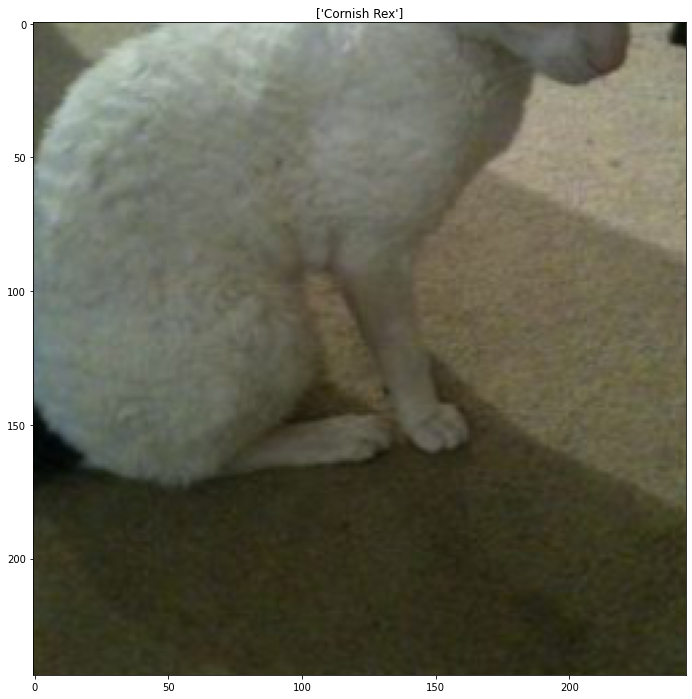

In [24]:
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.figure(figsize=(15, 12))
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)


inputs, classes = next(iter(dataloaders['train']))
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [6]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = model.state_dict()
    best_acc = 0.0
    
    losses = {'train': [], 'val': []}

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)
        for phase in ['train', 'val']:
            if phase == 'train':
                scheduler.step()
                model.train(True)
            else:
                model.train(False) 
            running_loss = 0.0
            running_corrects = 0

            for data in dataloaders[phase]:
                inputs, labels = data
                if use_gpu:
                    inputs = inputs.cuda()
                    labels = labels.cuda()
                else:
                    inputs, labels = inputs, labels
                optimizer.zero_grad()
                
                outputs = model(inputs)
                _, preds = torch.max(outputs.data, 1)
                loss = criterion(outputs, labels)

                if phase == 'train':
                    loss.backward()
                    optimizer.step()
                    
                running_loss += loss.item()
                running_corrects += int(torch.sum(preds == labels.data))

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects / dataset_sizes[phase]
            
            losses[phase].append(epoch_loss)
            
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = model.state_dict()

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    model.load_state_dict(best_model_wts)
    return model, losses

In [8]:
def evaluate(model):
    model.train(False)
    runninig_correct = 0
    for data in dataloaders['val']:
        inputs, labels = data
        if use_gpu:
            inputs = inputs.cuda()
            labels = labels.cuda()
        output = model(inputs)
        _, predicted = torch.max(output, 1)
        runninig_correct += int(torch.sum(predicted == labels))
    return runninig_correct / dataset_sizes['val']

In [9]:
from ipywidgets import FloatProgress

In [ ]:
model_extractor = models.vgg16(pretrained=True)

In [50]:

for param in model_extractor.parameters():
    param.requires_grad = False

num_features = 25088
model_extractor.classifier = nn.Linear(num_features, 3)

if use_gpu:
    model_extractor = model_extractor.cuda()

loss_fn = nn.CrossEntropyLoss()

optimizer = optim.SGD(model_extractor.classifier.parameters(), lr=0.001, momentum=0.9)

exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [18]:
model_extractor, losses = train_model(model_extractor, loss_fn, optimizer, exp_lr_scheduler, num_epochs=2)

Epoch 0/1
----------
train Loss: 1.1084 Acc: 0.6267
val Loss: 1.5145 Acc: 0.7417

Epoch 1/1
----------
train Loss: 0.5102 Acc: 0.8433
val Loss: 0.8470 Acc: 0.8083

Training complete in 11m 10s
Best val Acc: 0.808333


In [5]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler

import numpy as np
import torchvision
from torchvision import datasets, models, transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt
import time
import os

In [4]:
def pred_cats(img):
    data_transforms = transforms.Compose([
            transforms.RandomResizedCrop(244),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])

    from PIL import Image
    img = Image.fromarray(img)
    data_transforms_var = data_transforms(img)
    data_transforms_var = data_transforms_var.reshape((1, 3, 244, 244))
    class_names = ['Cornish Rex', 'Ragdoll', 'Tuxedo']
    outputs = model_extractor(data_transforms_var)
    _, preds = torch.max(outputs.data, 1)
    result = 'predicted: {}'.format(class_names[preds[0]])
    return result

In [8]:
import pickle

data_transforms = transforms.Compose([
        transforms.RandomResizedCrop(244),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

with open('vgg_cats.pkl', 'rb') as file:
    model_extractor = pickle.load(file)
import numpy as np
import cv2
static_back = None
video = cv2.VideoCapture('cats2.mp4')
length = int (video.get(cv2.CAP_PROP_FRAME_COUNT))
width = int (video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int (video.get(cv2.CAP_PROP_FRAME_HEIGHT))
out = cv2.VideoWriter('cats5.mp4', cv2.VideoWriter_fourcc(*'MP4V'),5.0,(width,height))
k=0
rgb_min = np.array((78, 12, 10), np.uint8)
rgb_max = np.array((163, 61, 79), np.uint8)
flag2 = 0
while (video.isOpened() and k < length):
    k+=1
    check,frame = video.read()
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    class_name = pred_cats(rgb)
    cv2.putText(frame, class_name, (30,30), cv2.FONT_HERSHEY_PLAIN, 1, (255, 255, 255), 1)
    #cv2.imshow('Color frame', frame)
    #cv2.imshow('frame', thresh)
    out.write(frame)
    key = cv2.waitKey(10)
    if key == ord('q'):
        break

video.release()
out.release()
cv2.destroyAllWindows()

In [20]:
print("Accuracy: {0:.4f}".format(evaluate(model_extractor)))

Accuracy: 0.8083


In [11]:
# Поиск по шаблону
import numpy as np
import cv2

video = cv2.VideoCapture('cats2.mp4')
length = int (video.get(cv2.CAP_PROP_FRAME_COUNT))
width = int (video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int (video.get(cv2.CAP_PROP_FRAME_HEIGHT))
out = cv2.VideoWriter('cats11.mp4', cv2.VideoWriter_fourcc(*'MP4V'),5.0,(width,height))
k=0
template = cv2.imread("temp.png", 0)
#template = cv2.resize(template, (70, 60))
w, h = template.shape[::-1]
while (video.isOpened() and k < length):
    k+=1
    check,frame = video.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    res = cv2.matchTemplate(gray,template,cv2.TM_CCOEFF_NORMED)
    threshold = 0.65
    loc = np.where( res >= threshold)
    for pt in zip(*loc[::-1]):
        cv2.rectangle(frame, pt, (pt[0] + w, pt[1] + h), (0,0,255), 1)
    #cv2.imshow('Color frame', frame)
    #cv2.imshow('frame', thresh)
    if len(loc[0]) != 0:
        out.write(frame)
    key = cv2.waitKey(10)
    if key == ord('q'):
        break

video.release()
out.release()
cv2.destroyAllWindows()


102 98


In [96]:
# Запись со своей камеры
import numpy as np
import cv2
static_back = None


cap = cv2.VideoCapture(0)
out = cv2.VideoWriter('r99999.mp4', cv2.VideoWriter_fourcc(*'MP4V'),24.0,(340,340))

k=0
rgb_min = np.array((0, 0, 0), np.uint8)
rgb_max = np.array((107, 30, 20), np.uint8)
flag2 = 0
arr = []
x1=[]
y1=[]
while (k < 200):
    k+=1
    ret, frame = cap.read()
    motion = 0
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    thresh = cv2.inRange(rgb, rgb_min, rgb_max)
    
    cnts, _ = cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for contour in cnts:
        if cv2.contourArea(contour) < 700:
            continue
        motion=1
        (x, y, w, h) = cv2.boundingRect(contour)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (155, 50, 165), 3)
        if (x+w,y+h) not in arr:
            arr.append((x+w,y+h))
            x1.append(x+w)
            y1.append(y+h)
    #cv2.imshow('Color frame', frame)
    #cv2.imshow('frame', thresh)
    img = cv2.resize(frame,(340,340))
    out.write(img)  
    key = cv2.waitKey(10)
    if key == ord('q'):
        break

cap.release()
out.release()
cv2.destroyAllWindows()

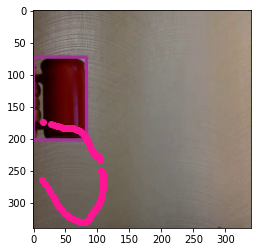

In [95]:
import numpy as np
import cv2
static_back = None
video = cv2.VideoCapture('r7.mp4')
length = int (video.get(cv2.CAP_PROP_FRAME_COUNT))
width = int (video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int (video.get(cv2.CAP_PROP_FRAME_HEIGHT))

k=0
rgb_min = np.array((0, 0, 0), np.uint8)
rgb_max = np.array((107, 30, 20), np.uint8)
flag2 = 0
arr = []
x1=[]
y1=[]
while (video.isOpened() and k < length):
    k+=1
    check,frame = video.read()
    motion = 0
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    thresh = cv2.inRange(rgb, rgb_min, rgb_max)
    
    cnts, _ = cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for contour in cnts:
        if cv2.contourArea(contour) < 700:
            continue
        motion=1
        (x, y, w, h) = cv2.boundingRect(contour)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (155, 50, 165), 3)
        if (x+w,y+h) not in arr:
            arr.append((x+w,y+h))
            x1.append(x+w)
            y1.append(y+h)
    #cv2.imshow('Color frame', frame)
    #cv2.imshow('frame', thresh)
    if k == 65:
        cv2.imwrite("cadr8.jpg", frame)
    key = cv2.waitKey(10)
    if key == ord('q'):
        break

video.release()
cv2.destroyAllWindows()

import matplotlib.pyplot as plt
img = plt.imread("cadr8.jpg")
fig, ax = plt.subplots()
ax.scatter(x1, y1,
           c = 'deeppink')
ax.imshow(img)

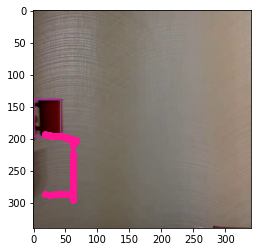

In [98]:
import numpy as np
import cv2
static_back = None
video = cv2.VideoCapture('r99.mp4')
length = int (video.get(cv2.CAP_PROP_FRAME_COUNT))
width = int (video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int (video.get(cv2.CAP_PROP_FRAME_HEIGHT))

k=0
rgb_min = np.array((0, 0, 0), np.uint8)
rgb_max = np.array((107, 30, 20), np.uint8)
flag2 = 0
arr = []
x1=[]
y1=[]
while (video.isOpened() and k < length):
    k+=1
    check,frame = video.read()
    motion = 0
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    thresh = cv2.inRange(rgb, rgb_min, rgb_max)
    
    cnts, _ = cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for contour in cnts:
        if cv2.contourArea(contour) < 700:
            continue
        motion=1
        (x, y, w, h) = cv2.boundingRect(contour)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (155, 50, 165), 1)
        if (x+w,y+h) not in arr:
            arr.append((x+w,y+h))
            x1.append(x+w)
            y1.append(y+h)
    #cv2.imshow('Color frame', frame)
    #cv2.imshow('frame', thresh)
    if k == 65:
        cv2.imwrite("cadr8.jpg", frame)
    key = cv2.waitKey(10)
    if key == ord('q'):
        break

video.release()
cv2.destroyAllWindows()

import matplotlib.pyplot as plt
img = plt.imread("cadr8.jpg")
fig, ax = plt.subplots()
ax.scatter(x1, y1,
           c = 'deeppink')
ax.imshow(img)